# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [5]:
!pip -q install ./python

In [3]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from ddpg_agent import Agent
from collections import deque
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# SINGLE AGENT ENVIRONMENT
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# USING MULTIPLE AGENTS
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Setting up the agent, DDPG Algorithm


In [7]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=0)

In [8]:
def ddpg_train(n_episodes=1000, max_t=10000, num_agents=num_agents, print_every=100):
    """DDQN Algorithm.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        print_every (int): frequency of printing information throughout iteration """
    
    scores_list = []
    scores_deque = deque(maxlen=print_every)
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations          
        scores = np.zeros(num_agents)
        
        while True:
            actions = []
            for i_agent in range(num_agents):
                agent.reset()
                actions.append(agent.act(states[i_agent]))
                
            env_info = env.step(actions)[brain_name]        # send actions to the environment
            next_states = env_info.vector_observations   # get the next state for every agent
            rewards = env_info.rewards                   # get the reward for every agent
            dones = env_info.local_done                 # see if episode has finished
            
            for i_agent in range(num_agents):
                agent.step(states[i_agent], actions[i_agent],
                           rewards[i_agent], next_states[i_agent],
                           dones[i_agent]) 
 
            agent.update_t_step()
            for i in range(10):
                agent.step_learn()
                
            scores += rewards                                # update the scores
            states = next_states                             # roll over the states to next time step
            if np.any(dones):                                       # exit loop if episode finished
                break
        
        scores_deque.append(np.mean(scores))       # save most recent score
        scores_list.append(np.mean(scores))             # save most recent score

        print('\rEpisode {}\tAverage Score over last 100 episodes: {:.2f}\n \t \t Average Score (All Agents) Recent Episode: {:.2f}'.format(i_episode, np.mean(scores_deque),
                                                        np.mean(scores)), end="")
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_20agents_new.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_20agents_new.pth')
        
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_20agents_solved_new.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_20agents_solved_new.pth')
            break
            
    return scores_list

Episode 1	Average Score over last 100 episodes: 0.42
Episode 2	Average Score over last 100 episodes: 0.37
Episode 3	Average Score over last 100 episodes: 0.39
Episode 4	Average Score over last 100 episodes: 0.31
Episode 5	Average Score over last 100 episodes: 0.38
Episode 6	Average Score over last 100 episodes: 0.47
Episode 7	Average Score over last 100 episodes: 0.51
Episode 8	Average Score over last 100 episodes: 0.51
Episode 9	Average Score over last 100 episodes: 0.54
Episode 10	Average Score over last 100 episodes: 0.54
Episode 11	Average Score over last 100 episodes: 0.58
Episode 12	Average Score over last 100 episodes: 0.60
Episode 13	Average Score over last 100 episodes: 0.62
Episode 14	Average Score over last 100 episodes: 0.62
Episode 15	Average Score over last 100 episodes: 0.62
Episode 16	Average Score over last 100 episodes: 0.61
Episode 17	Average Score over last 100 episodes: 0.60
Episode 18	Average Score over last 100 episodes: 0.59
Episode 19	Average Score over last 10

Episode 151	Average Score over last 100 episodes: 4.57
Episode 152	Average Score over last 100 episodes: 4.62
Episode 153	Average Score over last 100 episodes: 4.69
Episode 154	Average Score over last 100 episodes: 4.76
Episode 155	Average Score over last 100 episodes: 4.83
Episode 156	Average Score over last 100 episodes: 4.90
Episode 157	Average Score over last 100 episodes: 4.97
Episode 158	Average Score over last 100 episodes: 5.04
Episode 159	Average Score over last 100 episodes: 5.11
Episode 160	Average Score over last 100 episodes: 5.19
Episode 161	Average Score over last 100 episodes: 5.28
Episode 162	Average Score over last 100 episodes: 5.38
Episode 163	Average Score over last 100 episodes: 5.49
Episode 164	Average Score over last 100 episodes: 5.58
Episode 165	Average Score over last 100 episodes: 5.69
Episode 166	Average Score over last 100 episodes: 5.79
Episode 167	Average Score over last 100 episodes: 5.90
Episode 168	Average Score over last 100 episodes: 5.99
Episode 16

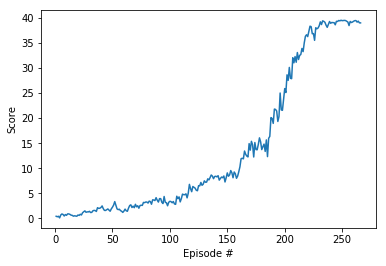

In [9]:
scores = ddpg_train(n_episodes = 1000, max_t=1000, num_agents=num_agents)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
env.close()

In [3]:
# downloading all contents for submission
!tar cvf notebook.tar.gz *

SyntaxError: invalid syntax (<ipython-input-3-01bd4f806691>, line 2)